This notebook can be download from [here](https://gitlab.com/genepy3d/genepy3d.gitlab.io/-/blob/master/source/working_with_tree.ipynb).

# Working with tree

Tree is a data structure that is usually used to handle neuron. GeNePy3D provides class `Tree` from module `obj.trees` allowing you to read and extract useful features from neuron tree. Let's first import it.

In [1]:
from genepy3d.obj.trees import Tree

## Reading tree

You can load neuron from standard format such as **.swc** file (see [here](http://www.neuronland.org/NLMorphologyConverter/MorphologyFormats/SWC/Spec.html) for its description):

In [2]:
filename = "data/FT_T_dG-2.swc"
neuron = Tree.from_swc(filename)

GeNePy3D also supports class `SWC` in module `io.swc` to handle reading all neurons from directory. It is possible to read neuron directly from a *Catmaid server* by using `Tree.from_catmaid_server()` function. 

You can then plot neuron by `neuron.plot()`:

## Plotting tree

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib notebook

<IPython.core.display.Javascript object>


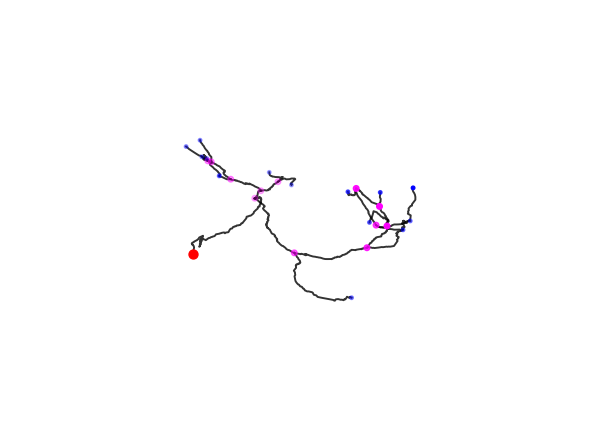

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111,projection="3d")
neuron.plot(ax)
ax.axis('off')
plt.tight_layout();

The `neuron.plot()` function displays some basic information of neuron such as root node (red), branching nodes (magenta) and leaves (blue). The function inherits arguments from `plot()` and `scatter()` functions in `Matplotlib`. You can read their documentation to customize your plot. Some examples of using `neuron.plot()` will be also illustrated later. 

## Decomposing tree

Decomposition of tree into subsegments is needed for measuring local structure of the tree, e.g. computing length, shape of tree or resampling tree. GeNePy3D consists of different decomposition schemes:

### Branching decomposition

Here, the neuron is decomposed into fragments separated based on branching nodes.

In [5]:
branching_segments = neuron.decompose_segments()

The return is a `Dictionary` in `Python` whose key denotes pair of begin-end node IDs of a branching segment, and whose value contains list of node IDs corresponding to that branching segment.

In [6]:
branching_segments.keys()

dict_keys(['265_285', '265_765', '714_738', '714_1037', '714_1085', '709_1064', '709_1076', '665_1048', '482_622', '880_911', '1171_1199', '1171_1237', '843_1214', '810_1138', '395_1006', '1_205', '205_231', '231_265', '231_665', '665_709', '709_714', '205_395', '395_482', '482_810', '810_843', '843_880', '880_1171'])

Let's plot the decompostion:

In [7]:
import numpy as np

<IPython.core.display.Javascript object>


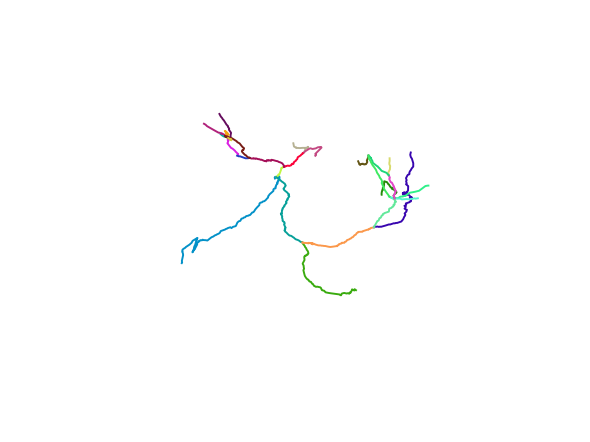

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111,projection="3d")

for seg in branching_segments.values(): # browse node IDs for each segment
    neuron.to_curve(seg).plot(ax,line_args={"c":np.random.rand(3)},show_root=False)

ax.axis('off');
plt.tight_layout()

### Leaf decomposition 

The "leaf" mode decomposes the tree into subbranches starting from root to every leaf.

In [9]:
leave_segments = neuron.decompose_leaves()

In [10]:
leave_segments.keys()

dict_keys([285, 765, 738, 1037, 1085, 1064, 1076, 1048, 622, 911, 1199, 1237, 1214, 1138, 1006])

Let's plot them (each decomposed segment is constantly shifted for clear visual).

<IPython.core.display.Javascript object>


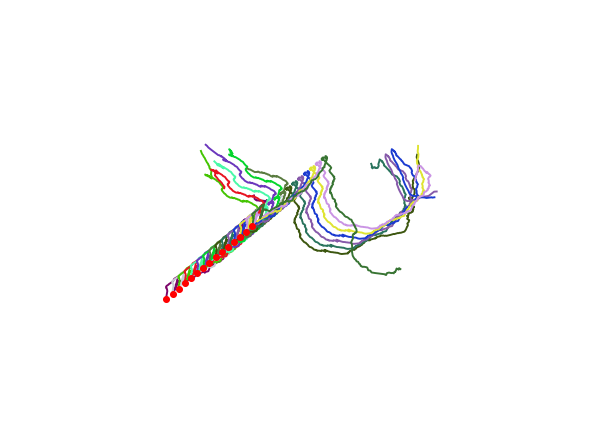

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111,projection="3d")
i = 0
for seg in leave_segments.values():
    neuron.to_curve(seg).transform(dz=i,dx=i,dy=i).plot(ax,line_args={"c":np.random.rand(3)})
    i+=3

ax.axis('off');
plt.tight_layout()

### Spine decomposition

The spine (longest branch) is first extracted from tree, then the process is repeated for every branch starting from the spine.

In [12]:
spine_segments = neuron.decompose_spines()

Similar to branching decomposition, the return is a `Python Dictionary`:

In [13]:
spine_segments.keys()

dict_keys(['1_1199', '205_738', '231_285', '265_765', '665_1048', '709_1064', '709_1076', '714_1037', '714_1085', '395_1006', '482_622', '810_1138', '843_1214', '880_911', '1171_1237'])

Let's plot it:

<IPython.core.display.Javascript object>


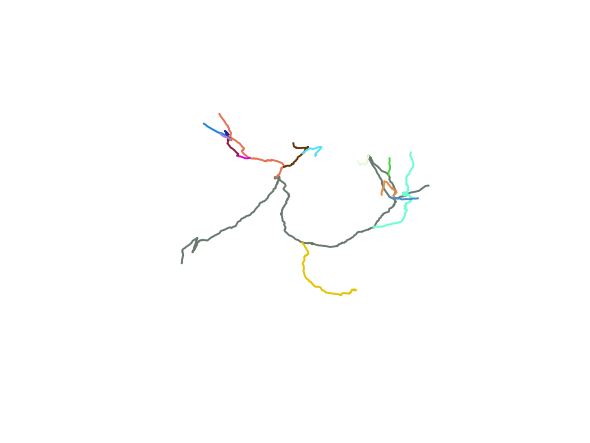

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111,projection="3d")
for seg in spine_segments.values():
    neuron.to_curve(seg).plot(ax,line_args={"c":np.random.rand(3)},show_root=False)

ax.axis('off')
plt.tight_layout();

## Basic operations

A short summary of neuron can be obtained by:

In [15]:
short_summary = neuron.summary()

In [16]:
short_summary

id                           0
name                 FT_T_dG-2
root                       [1]
nb_nodes                [1237]
nb_leaves                 [15]
nb_branchingnodes         [12]
nb_connectors              [0]
dtype: object

The return is a `Serie` in `Pandas` containing "name", "root ID", "number of nodes", "number of leaves", "number of branching nodes" and "number of connectors". Using `short_summary["nb_nodes"]`, `short_summary["nb_leaves"]`, etc to get these values. Please read the `Pandas Serie` documentation to get more useful operations.

More features can be computed by the following functions:

### Branching nodes

List of branching node IDs:

In [17]:
print(neuron.get_branchingnodes())

[205, 231, 265, 665, 709, 714, 395, 482, 810, 843, 880, 1171]


### Leaves

List of leaf node IDs:

In [18]:
print(neuron.get_leaves())

[285, 765, 738, 1037, 1085, 1064, 1076, 1048, 622, 911, 1199, 1237, 1214, 1138, 1006]


### Length

Total length:

In [19]:
print(neuron.compute_length())

999.2763607087381


### Strahler order

`Pandas Serie` indicating Strahler order for every node:

The left column representing the node IDs is the index of `Pandas Serie`, where the right one is the Strahler orders. You can display the Strahler order by setting `show_strahler = True` in `neuron.plot()`.

In [20]:
strahler = neuron.compute_strahler_order()
strahler

1       3
2       3
3       3
4       3
5       3
       ..
1002    1
1003    1
1004    1
1005    1
1006    1
Name: strahler_order, Length: 1237, dtype: int64

Let's plot the neuron colored by strahler order:

<IPython.core.display.Javascript object>


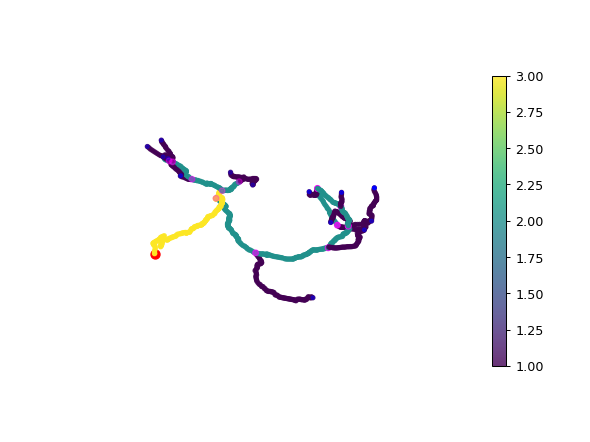

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111,projection="3d")
neuron.plot(ax,weights=strahler,show_cbar=True)
ax.axis('off')
plt.tight_layout();

The default color map is not nice to display strahler order which is discrete values. We can change to a custom color map.

<IPython.core.display.Javascript object>


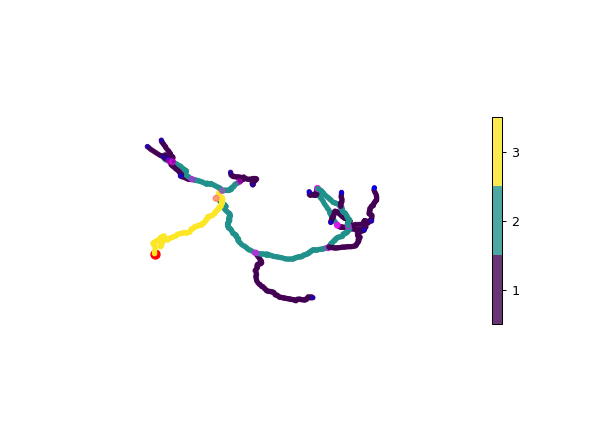

In [22]:
levels = strahler.unique() # get strahler values
mycmap = plt.get_cmap('viridis', len(levels)) # custom "viridis" by a specific number of color points

fig = plt.figure()
ax = fig.add_subplot(111,projection="3d")
neuron.plot(ax,weights=strahler,
            point_args={"cmap":mycmap,"vmin":min(levels)-0.5,"vmax":max(levels)+0.5},
            show_cbar=True,cbar_args={"ticks":levels,"shrink":0.5})
ax.axis('off')
plt.tight_layout();

### Spine
Compute the spine (longest branch) of tree, the longest branch from root to leaf. The function below returns the list of spine nodes:

In [23]:
spine_nodes = neuron.compute_spine()
print("number of spine nodes:",len(spine_nodes))

number of spine nodes: 578


you can then calculate its length:

In [24]:
spine_length = neuron.compute_length(spine_nodes)
print("spine length:",spine_length)

spine length: 434.84330582000393


or getting its coordinates:

In [25]:
spine_coors = neuron.get_coordinates(spine_nodes)

In [26]:
spine_coors

x           y           z
nodeid                                    
1       225.545622  149.960008  133.680901
2       225.502977  150.280694  133.797264
3       225.252150  150.308938  135.109093
4       225.447199  150.501290  136.559937
5       225.601225  150.738511  138.014336
...            ...         ...         ...
1195    334.064711  243.724496  145.037956
1196    334.504194  244.147058  145.435364
1197    334.946882  244.555413  145.833778
1198    335.675322  245.799294  145.336487
1199    336.244780  245.925210  145.414085

[578 rows x 3 columns]

The return is a `Dataframe` in `Pandas` allowing you to easilly manipulate the table. For example the following script returns subtable where y > 245 microns.

In [27]:
query = spine_coors["y"] > 245
spine_coors[query]

x           y           z
nodeid                                    
1198    335.675322  245.799294  145.336487
1199    336.244780  245.925210  145.414085

You can also convert the spine segment to Curve object:

In [28]:
spine_curve = neuron.to_curve(spine_nodes)

Let's plot the spine:

<IPython.core.display.Javascript object>


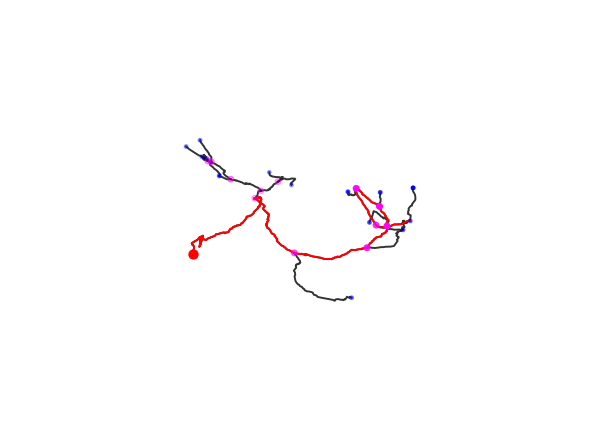

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111,projection="3d")
neuron.plot(ax)
spine_curve.plot(ax,line_args={"c":"r"});
ax.axis('off');
plt.tight_layout()

We provide `line_args` argument whose items are exactly the arguments of `plot()` function in `Matplotlib`.

### Angles

We can compute the angles with three axes at every node on the tree. Angle at a node N on the tree is the angle between vector (N => N+1) and three basic vectors ux, uy and uz.

In [30]:
df = neuron.compute_angles_axes(decomposed_method="branching")

The return is a Pandas dataframe containing the angles (in rad) with the three axes x, y and z.

In [31]:
df

thetax    thetay    thetaz
seg_key  nodeid                              
265_285  265     0.852844  0.953655  1.067840
         266     1.239117  1.534316  0.333834
         267     1.236795  1.521986  0.337826
         268     0.908624  0.838586  1.139098
         269     1.498241  0.479266  1.097982
...                   ...       ...       ...
880_1171 1167    1.196878  1.331648  2.691166
         1168    1.199244  1.303621  2.676054
         1169    1.509958  1.276876  2.841072
         1170    1.464697  1.077520  2.634987
         1171         NaN       NaN       NaN

[1263 rows x 3 columns]

Then plotting the angle histogram.

<IPython.core.display.Javascript object>


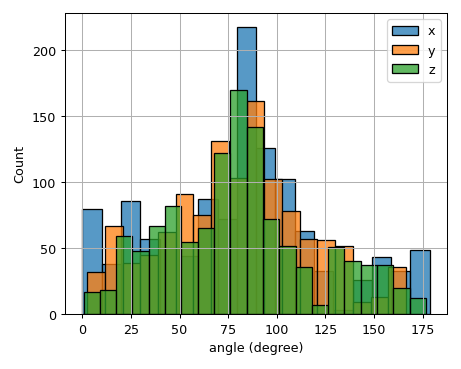

In [32]:
import seaborn as sns
import numpy as np

# root and branching nodes are excluded from the calculation
excluded_nodes = neuron.get_root() + neuron.get_branchingnodes()
df = df.reset_index()
sdf = df[~df['nodeid'].isin(excluded_nodes)]

fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(111)
sns.histplot(sdf["thetax"]*180/np.pi);
sns.histplot(sdf["thetay"]*180/np.pi);
sns.histplot(sdf["thetaz"]*180/np.pi);
plt.legend(["x","y","z"]);
ax.grid();
ax.set_xlabel("angle (degree)");
plt.tight_layout();

## Extracting subtrees

GeNePy3D provides `neuron.extract_subtrees()` function to extract subtrees at a given node on the tree. For example the following script executes extraction at the a branching node:

In [33]:
# get first branching node
branching_nodes = neuron.get_branchingnodes()
split_node = branching_nodes[0]

# extract subtrees
sub_neuron = neuron.extract_subtrees(split_node)
sup_neuron = neuron.extract_subtrees(split_node,to_children=False)

We can get subtree by different conditions, for example the `sub_neuron` below is the lower subtree starting from `split_node` toward its children whereas the `sup_neuron`is the upper subtree ending at `split_node`.

Let's plot them:

<IPython.core.display.Javascript object>


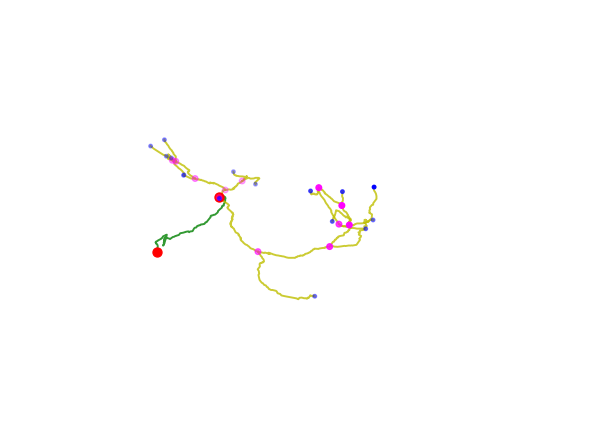

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111,projection="3d")
sup_neuron.plot(ax,line_args={"c":"g"})
sub_neuron.plot(ax,line_args={"c":"y"})
ax.axis('off');
plt.tight_layout();

## Pruning tree

Leave segments can be pruned based on their lengths.

<IPython.core.display.Javascript object>


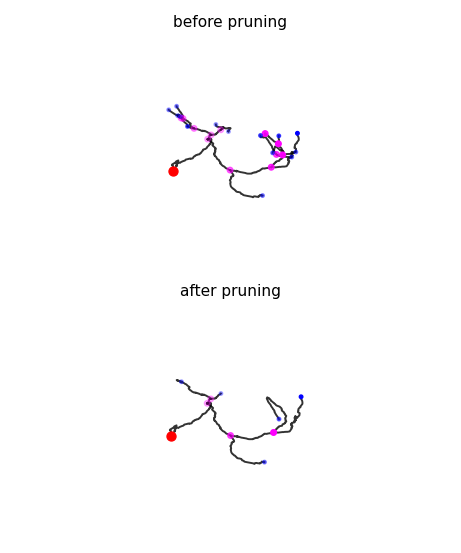

In [35]:
# prune leave segments whose lengths < 50 microns
neuron_pruned = neuron.prune_leaves(length=50)

fig = plt.figure(figsize=(5,6))
ax = fig.add_subplot(211,projection="3d")
neuron.plot(ax)
ax.set_title("before pruning")
ax.axis('off');
ax = fig.add_subplot(212,projection="3d")
neuron_pruned.plot(ax)
ax.set_title("after pruning")
ax.axis('off');
plt.tight_layout();

## Local 3D scales

Local 3D scale is used to measure the 3D shape complexity of a curve. We provide a similar function when working with tree by decomposing the tree and computing local 3D scale over the decomposed segments.

In [36]:
sigma_lst = np.arange(0,205,5) # List of sigma (or scale)
df = neuron.compute_local_3d_scale_sigma(sigma_lst)

The return is a dataframe of computed local 3D scales indexed by node IDs.

In [37]:
df

nodeid
1        80.333333
2        80.333333
3        80.333333
4        79.666667
5        79.666667
           ...    
1233    200.000000
1234    200.000000
1235    200.000000
1236    200.000000
1237    200.000000
Name: local_scale, Length: 1237, dtype: float64

Let's plot the neuron weighted by the local 3D scales:

<IPython.core.display.Javascript object>


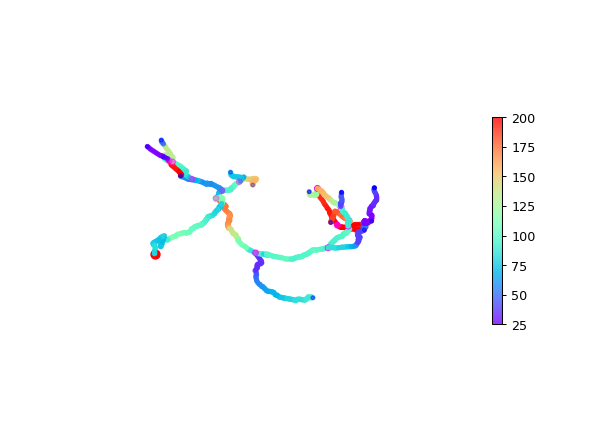

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111,projection="3d")
neuron.plot(ax,weights=df,point_args={"cmap":"rainbow"},
            show_cbar=True,cbar_args={"shrink":0.5})

ax.axis('off');
plt.tight_layout();